# Observations:
    -In the bar graphs below, we are able to conclude that the drug regimen, Ramicane, had the most measurements taken out of any other drug regimen.
    -In the pie charts below, we are able to conclude that there were slightly more male mice in the trial than female mice.
    -In the scatter plot below, we are able to conclude that as the weight of the mouse increases, so does the volume size of the tumor measured in mm3.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how = 'left', on = "Mouse ID")
                         
# Display the data table for preview
combined_data

In [2]:
# Checking the number of mice.
Num_Mice = combined_data["Mouse ID"].nunique()
Num_Mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup = combined_data.drop_duplicates(["Mouse ID", "Timepoint"], keep= 'first', inplace = False)
drop_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
 # Checking the number of mice in the clean DataFrame.
clean_df = drop_dup["Mouse ID"].nunique()
clean_df

249

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = drop_dup.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = drop_dup.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = drop_dup.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = drop_dup.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = drop_dup.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [25]:
summary_df = pd.DataFrame({
                          "Mean": mean,
                          "Median": median,
                          "Variance": variance,
                          "Standard Deviation": std,
                          "Standard Error of Mean": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
grouped_drug = drop_dup.groupby("Drug Regimen")["Mouse ID"].count()
grouped_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [196]:
users = grouped_drug.unique()
drugs = drop_dup["Drug Regimen"]
users

array([230, 178, 188, 186, 181, 156, 228, 182], dtype=int64)

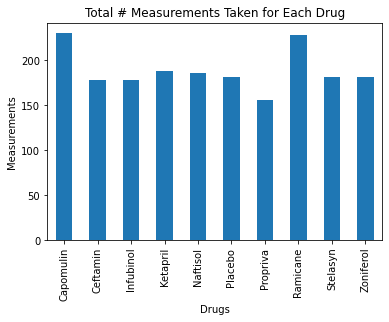

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grouped_drug.plot(kind = "bar")
plt.title("Total # Measurements Taken for Each Drug")
plt.xlabel("Drugs")
plt.ylabel("Measurements")
plt.show()

(-0.75, 9.75)

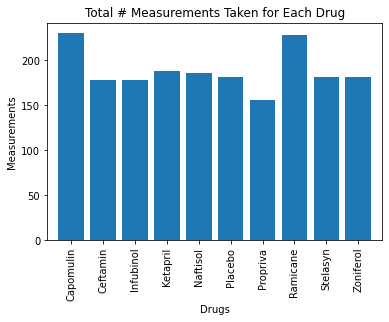

In [198]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(grouped_drug))
plt.bar(x_axis, grouped_drug)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane","Stelasyn", "Zoniferol"],rotation = "vertical")
plt.title("Total # Measurements Taken for Each Drug")
plt.ylabel("Measurements")
plt.xlabel("Drugs")
plt.xlim(-.75,len(x_axis)-.25)

In [80]:
drop2 = combined_data.drop_duplicates(["Mouse ID"], keep= 'first', inplace = False)
drop2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [96]:
new = drop2.groupby("Sex")
new.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
85,j913,Ramicane,Female,4,17,0,45.0,0
125,r554,Capomulin,Female,8,17,0,45.0,0
135,m957,Capomulin,Female,3,19,0,45.0,0


In [93]:
sex = new.nunique()
sex

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,,
Female,124,10,1,24,14,1,1,1
Male,125,10,1,24,14,1,1,1


In [112]:
total = sex.iloc[:,0]
male = sex.iloc[1,0]
female = sex.iloc[0,0]
tot_gender = male + female
fem_perc = (female/tot_gender)*100
male_perc = (male/tot_gender)*100

In [113]:
gender_df = pd.DataFrame({"Total Gender": total,
                        "Percentage": [(female/tot_gender)*100, (male/tot_gender)*100],
})
gender_df

,Total Gender,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


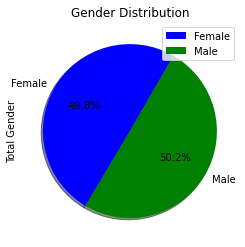

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["Blue", "Green"]
plot = gender_df.plot.pie(title = "Gender Distribution", y="Total Gender" , colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 60)

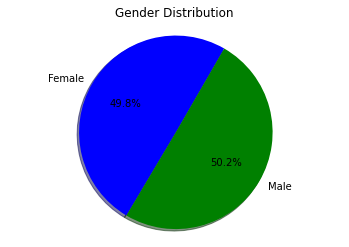

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = ["Female", "Male"]
sides = [49.799197,50.200803]
colors = ["blue", "green"]
plt.title("Gender Distribution")
plt.pie(sides,labels = gender_label, colors=colors, autopct = "%1.1f%%", shadow = True, startangle = 60)
plt.axis("equal")
plt.show()

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = drop_dup.loc[drop_dup["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ramicane = drop_dup.loc[drop_dup["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
infubinol =  drop_dup.loc[drop_dup["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
ceftamin = drop_dup.loc[drop_dup["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
capomulin.head()

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
Name: Tumor Volume (mm3), dtype: float64

In [202]:
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [203]:
quartile_cap = capomulin.quantile([.25,.5,.75])
lowerq_cap = quartile_cap[.25]
upperq_cap = quartile_cap[.75]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap - (1.5*iqr_cap)
print(f"Outliers are anything below  {lower_bound_cap}  and above  {upper_bound_cap} .")

Outliers are anything below  26.714832162499995  and above  34.0288992975 .


In [159]:
quartile_ram = ramicane.quantile([.25,.5,.75])
lowerq_ram = quartile_ram[.25]
upperq_ram = quartile_ram[.75]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram - (1.5*iqr_ram)
print(f"Outliers are anything below  {lower_bound_ram}  and above  {upper_bound_ram} .")

Outliers are anything below  24.18658646249998  and above  32.51195187749999 .


In [160]:
quartile_inf = infubinol.quantile([.25,.5,.75])
lowerq_inf = quartile_inf[.25]
upperq_inf = quartile_inf[.75]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf - (1.5*iqr_inf)
print(f"Outliers are anything below  {lower_bound_inf}  and above  {upper_bound_inf} .")

Outliers are anything below  32.309217298749985  and above  42.31130796625 .


In [161]:
quartile_cef = ceftamin.quantile([.25,.5,.75])
lowerq_cef = quartile_cef[.25]
upperq_cef = quartile_cef[.75]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef - (1.5*iqr_cef)
print(f"Outliers are anything below  {lower_bound_cef}  and above  {upper_bound_cef} .")

Outliers are anything below  32.818911426250004  and above  42.411921883750004 .


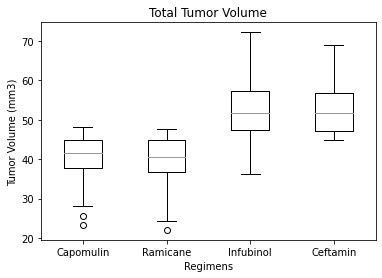

In [209]:
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = regimens)
plt.title("Total Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Regimens")
plt.show()

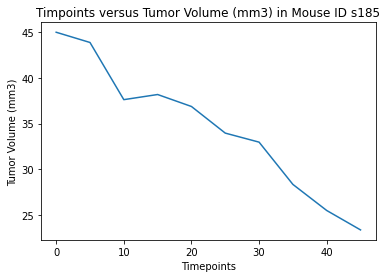

In [169]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_chart = drop_dup.loc[drop_dup["Drug Regimen"] == "Capumolin"]
table = drop_dup.loc[drop_dup["Mouse ID"] == "s185"]

plt.plot(table["Timepoint"], table["Tumor Volume (mm3)"])
plt.title("Timpoints versus Tumor Volume (mm3) in Mouse ID s185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoints")
plt.show()

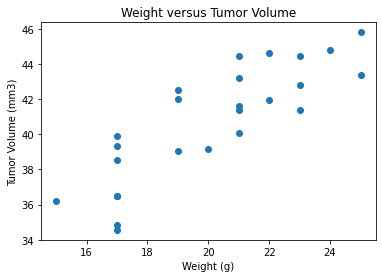

In [182]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = drop_dup.loc[drop_dup['Drug Regimen'] == 'Capomulin']
avg_weight = weight.groupby(["Mouse ID"]).mean()

plt.scatter(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])
plt.title("Weight versus Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

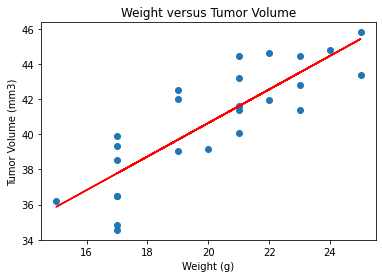

R value = 0.7088568047708717


In [186]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])
plt.title("Weight versus Tumor Volume")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])
regress_values = avg_weight["Weight (g)"] * slope + intercept
plt.plot(avg_weight["Weight (g)"], regress_values, "r")
plt.show()
print(f"R value = {rvalue**2}")